In [2]:
import sys, os
sys.path.insert(0, os.getcwd())
sys.path.insert(0, os.path.dirname(os.getcwd()))
sys.path.insert(0,os.path.join(os.path.dirname(os.getcwd()), "testing"))
from testing.isi_corr import *

def dnn_vs_um(mt_path:str):
    mt = pd.read_csv(mt_path)
    sessions = set(mt["RecSes1"].unique())
    dnn_auc, um_auc, numbers_d, numbers_u = [], [], [], []
    for r1 in tqdm(sessions):
        for r2 in tqdm(sessions):
            if r1>=r2:
                continue
            dnn, um, n_dnn, n_um = auc_one_pair(mt, r1, r2, mt_path=mt_path, dist_thresh=20)
            if dnn is not None and um is not None:
                dnn_auc.append(dnn)
                numbers_d.append(n_dnn)
                um_auc.append(um)
                numbers_u.append(n_um)
    return dnn_auc, numbers_d, um_auc, numbers_u

def dnn_vs_dnn(mt_path1:str, mt_path2:str):
    mt1 = pd.read_csv(mt_path1)
    mt2 = pd.read_csv(mt_path2)
    sessions = set(mt1["RecSes1"].unique())
    dnn1_auc, dnn2_auc, numbers_d1, numbers_d2 = [], [], [], []
    for r1 in tqdm(sessions):
        for r2 in tqdm(sessions):
            if r1>=r2:
                continue
            dnn1, _, n_dnn1, _ = auc_one_pair(mt1, r1, r2, mt_path=mt_path1, dist_thresh=20)
            dnn2, _, n_dnn2, _ = auc_one_pair(mt2, r1, r2, mt_path=mt_path2, dist_thresh=20)
            if dnn1 is not None and dnn2 is not None:
                dnn1_auc.append(dnn1)
                numbers_d1.append(n_dnn1)
                dnn2_auc.append(dnn2)
                numbers_d2.append(n_dnn2)
    return dnn1_auc, numbers_d1, dnn2_auc, numbers_d2


In [4]:
test_data_root = os.path.join(os.path.dirname(os.path.dirname(os.getcwd())), "ALL_DATA")
mt_path = os.path.join(test_data_root, "AL036", "19011116882", "3", "new_matchtable.csv")
mt_path_wentao = os.path.join(test_data_root, "AL036", "19011116882", "3", "wentao_model.csv")

my_auc, my_n, wen_auc, wen_n = dnn_vs_dnn(mt_path, mt_path_wentao)


  0%|          | 0/21 [00:00<?, ?it/s]

no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


  5%|▍         | 1/21 [12:23<4:07:55, 743.76s/it]

no DNN matches found!


no DNN matches found!


no DNN matches found!
no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


no DNN matches found!


 10%|▉         | 2/21 [22:35<3:30:53, 665.96s/it]

no DNN matches found!


no DNN matches found!


no DNN matches found!


100%|██████████| 21/21 [1:38:49<00:00, 282.36s/it]


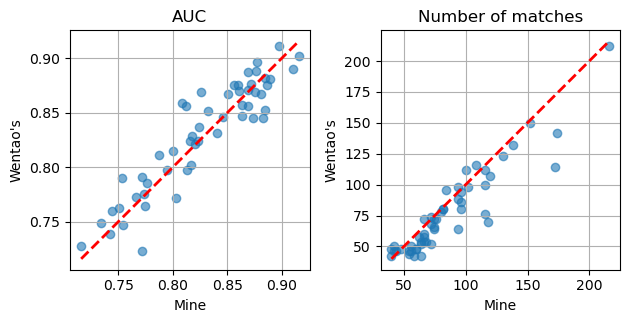

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121, aspect='equal')
ax1.scatter(my_auc, wen_auc, alpha=0.6)
ax1.plot([min(my_auc), max(my_auc)], [min(my_auc), max(my_auc)], 'r--', lw=2)
ax1.grid()
ax1.set_yticks(np.linspace(0.75, 0.90, 4))
ax1.set(title="AUC", xlabel="Mine", ylabel="Wentao's")
ax2 = fig.add_subplot(122, aspect='equal')
ax2.scatter(my_n, wen_n, alpha=0.6)
ax2.plot([min(my_n), max(my_n)], [min(my_n), max(my_n)], 'r--', lw=2)
ax2.grid()
ax2.set(title="Number of matches", xlabel="Mine", ylabel="Wentao's")
fig.tight_layout()
plt.show()

In [52]:
sessions = mt["RecSes1"].unique()

mat = np.zeros((len(sessions), len(sessions)))

for i, j in tqdm(np.ndindex(mat.shape), total=len(sessions)**2):
    small=mt.loc[(mt["RecSes1"].isin([sessions[i],sessions[j]])) & (mt["RecSes2"].isin([sessions[i],sessions[j]])),:]
    med = np.median(small["DNNSim"])
    mat[i,j] = med


100%|██████████| 441/441 [00:29<00:00, 15.20it/s]


Text(0.5, 1.0, 'DNNSim medians for AL036 sessions')

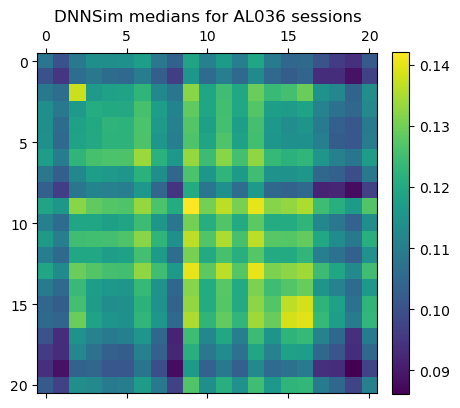

In [57]:
cax = plt.matshow(mat)
plt.colorbar(cax,fraction=0.046, pad=0.04)
plt.title("DNNSim medians for AL036 sessions")